# Csv DataFrame

In [34]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt

## Profesores

In [35]:
profes_df = pd.read_csv("../data/profesores.csv")
profes_df

,nombre,correo,password,nivel,instituto,grado,carrera,tipo
0,Alicia Santiago Santos,alicia@mixteco.utm.mx,alis,4,4,Dra.,7.0,0
1,Armando Alcalá Vallejo,avallejo@mixteco.utm.mx,gdfgdf,4,4,M.M.M.,7.0,0
2,Franco Barragán Mendoza,franco@mixteco.utm.mx,matemendoza,3,4,Dr.,7.0,0
3,Luz Del Carmen Álvarez Marín,lalvarez@mixteco.utm.mx,hgf,4,4,Dra.,7.0,0
4,Cuauhtémoc Héctor Castañeda Roldán,ccroldan@mixteco.utm.mx,bvb,4,4,Dr.,7.0,0
...,...,...,...,...,...,...,...,...
240,Eliezer Luna Rivera,Eliezer@mixteco.utm.mx,x,4,3,Arq.,32.0,5
241,María de Jesús Martínez López,mmartinez@mixteco.utm.mx,x,4,4,Dra.,17.0,6
242,Enrique Reyes Arzola,enriquereyesarzola@mixteco.utm.mx,x,4,13,Mtro.,11.0,6
243,Claudia Janette Urbano López,claudiaurbano@mixteco.utm.mx,x,4,5,Mtra.,5.0,5


## Institutos

In [36]:
institutos_df = pd.read_csv("../data/institutos.csv")
institutos_df

,codigo,nombre
0,2,Instituto de computación
1,1,Instituto de electrónica y mecatrónica
2,3,Instituto de diseño
3,4,Instituto de física y matemáticas
4,5,Instituto de ciencias sociales y humanidades
5,8,Instituto de agroindustrias
6,0,vice-rectoria académica
7,100,Posgrado
8,9,Instituto de hidrología
9,10,Instituto de minería


## Carreras

In [37]:
carreras_df = pd.read_csv("../data/institutos.csv")
carreras_df

,codigo,nombre
0,2,Instituto de computación
1,1,Instituto de electrónica y mecatrónica
2,3,Instituto de diseño
3,4,Instituto de física y matemáticas
4,5,Instituto de ciencias sociales y humanidades
5,8,Instituto de agroindustrias
6,0,vice-rectoria académica
7,100,Posgrado
8,9,Instituto de hidrología
9,10,Instituto de minería


## Conexión a MySQL

In [38]:
mydb = mysql.connector.connect(
    host="localhost",
    user="root",
    password="x",
    database="data_science"
)

In [39]:
mycursor = mydb.cursor()

## Numero de profesores por carrera

### Consulta SQL

In [40]:
#sql = "SELECT C.nombre, C.sigla, COUNT(C.codigo) as cantidad FROM profesor P INNER JOIN carreras C ON P.idCarrera=C.codigo GROUP BY (C.id);"
sql = "SELECT C.nombre, C.siglas, COUNt(C.codigoCarrera) as cantidad FROM profesores P INNER JOIN carreras C ON P.carrera=C.codigoCarrera GROUP BY (C.codigoCarrera)"
consulta = pd.read_sql(sql,mydb)

/tmp/ipykernel_13335/1577063844.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  consulta = pd.read_sql(sql,mydb)


In [41]:
consulta

,nombre,siglas,cantidad
0,Ninguna,NULL,7
1,Ingeniería en Computación,IC,28
2,Ingeniería en Diseño,ID,18
3,Ingeniería en Electrónica,IE,16
4,Licenciatura en Ciencias Empresariales,LCE,43
5,Ingeniería en Alimentos,IA,16
6,Licenciatura en Matemáticas Aplicadas,LMA,36
7,Ingeniería Industrial,II,10
8,Estudios de Nuevos Materiales,ENM,1
9,Ingeniería en Mecatrónica,IM,15


### Importar información desde CSV

In [42]:
profesbycarreras_df = pd.read_csv("../data/profesoresBycarreras.csv")
profesbycarreras_df

,nombre,siglas,cantidad
0,Estudios de Nuevos Materiales,ENM,1
1,Ingeniería en Computación,IC,28
2,Ingeniería en Diseño,ID,18
3,Ingeniería en Electrónica,IE,16
4,Licenciatura en Ciencias Empresariales,LCE,43
5,Ingeniería en Alimentos,IA,14
6,Licenciatura en Matemáticas Aplicadas,LMA,36
7,Ingeniería Industrial,II,10
8,Ingeniería en Mecatrónica,IM,15
9,Ingeniería en Física Aplicada,IFA,18


### Gráfica

Text(0.5, 1.0, 'Gráfica de número de Profesores por carrera')

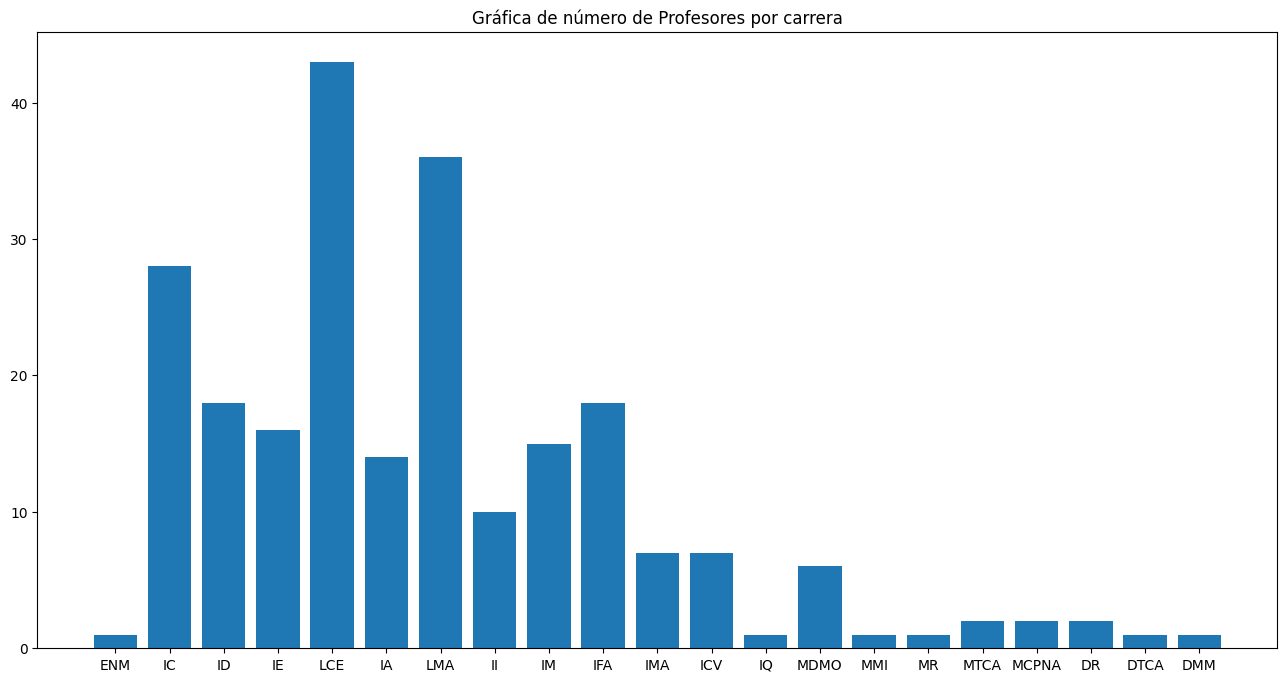

In [43]:
plt.figure(figsize=(16,8))
plt.bar(profesbycarreras_df['siglas'],profesbycarreras_df['cantidad'])
plt.title("UTM")
plt.title("Gráfica de número de Profesores por carrera")

## Número de profesores por instituto

### Consulta SQL

In [44]:
sql = "SELECT I.nombre, COUNt(I.codigo) as cantidad FROM profesores P INNER JOIN institutos I ON P.instituto=I.codigo GROUP BY (I.codigo)"
consulta = pd.read_sql(sql,mydb)

/tmp/ipykernel_13335/3359919200.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  consulta = pd.read_sql(sql,mydb)


In [45]:
consulta

,nombre,cantidad
0,Instituto de electrónica y mecatrónica,31
1,Instituto de computación,28
2,Instituto de diseño,25
3,Instituto de física y matemáticas,41
4,Instituto de ciencias sociales y humanidades,43
5,Instituto de agroindustrias,17
6,Instituto de hidrología,8
7,Instituto de minería,4
8,Centro de Estudios de Nuevos Materiales,1
9,Instituto de Ingeniería Industrial y Automotriz,17


### Importar de un CSV

In [46]:
profesbyinst_df = pd.read_csv("../data/profesoresByinstitutos.csv")
profesbyinst_df

,nombre,cantidad
0,Instituto de electrónica y mecatrónica,31
1,Instituto de computación,28
2,Instituto de diseño,25
3,Instituto de física y matemáticas,41
4,Instituto de ciencias sociales y humanidades,43
5,Instituto de agroindustrias,15
6,Instituto de hidrología,8
7,Instituto de minería,4
8,Centro de Estudios de Nuevos Materiales,1
9,Instituto de Ingeniería Industrial y Automotriz,17


### Grafica

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Instituto de electrónica y mecatrónica'),
  Text(1, 0, 'Instituto de computación'),
  Text(2, 0, 'Instituto de diseño'),
  Text(3, 0, 'Instituto de física y matemáticas'),
  Text(4, 0, 'Instituto de ciencias sociales y humanidades'),
  Text(5, 0, 'Instituto de agroindustrias'),
  Text(6, 0, 'Instituto de hidrología'),
  Text(7, 0, 'Instituto de minería'),
  Text(8, 0, 'Centro de Estudios de Nuevos Materiales'),
  Text(9, 0, 'Instituto de Ingeniería Industrial y Automotriz'),
  Text(10, 0, 'Centro de Modelación Matemática, Vinculación y Consultoría '),
  Text(11, 0, 'Posgrado')])

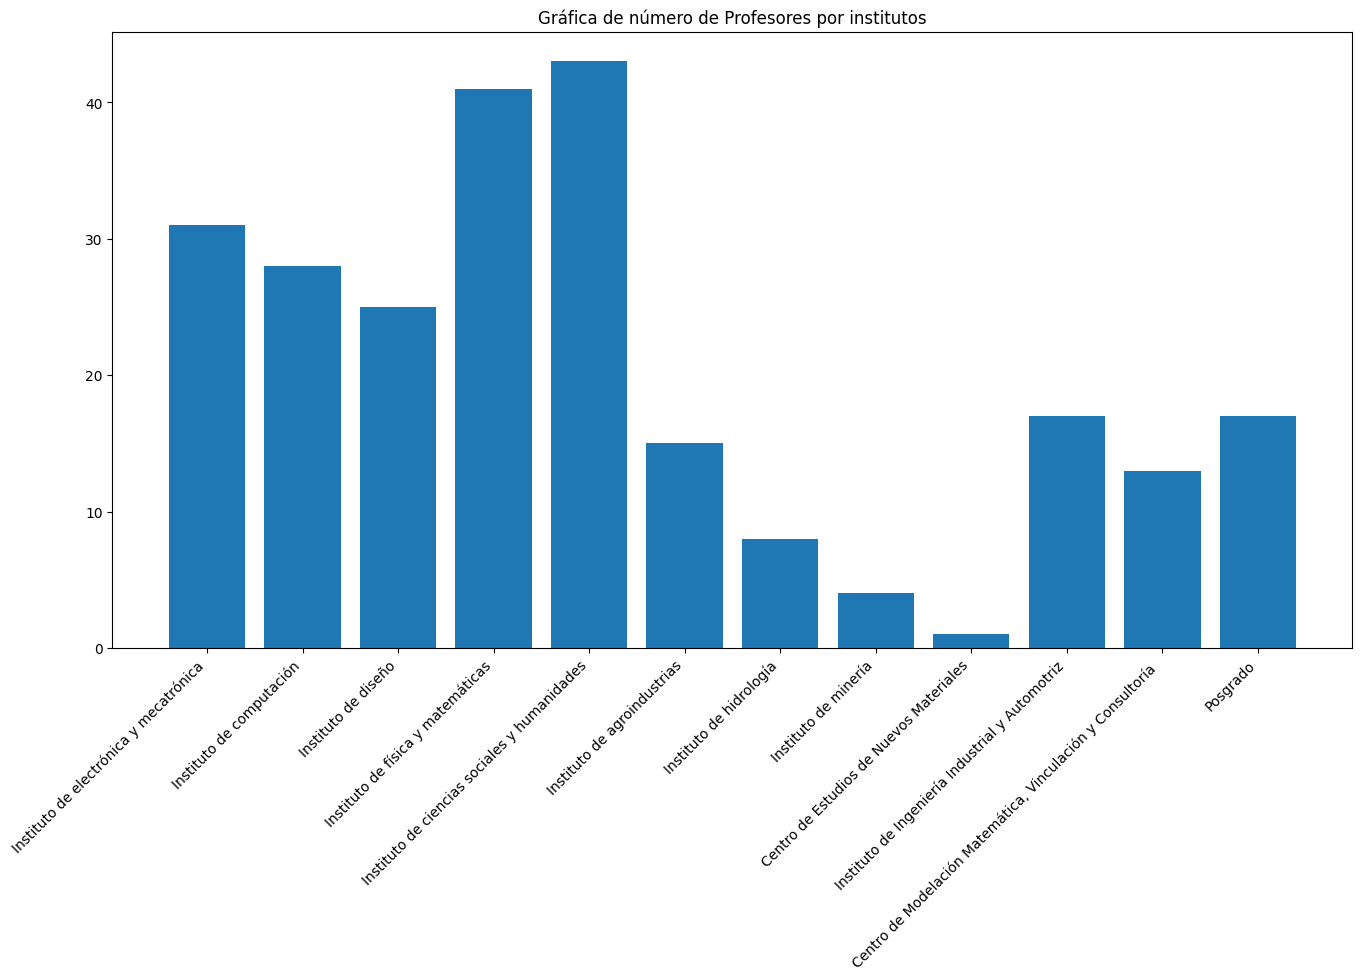

In [47]:
plt.figure(figsize=(16,8))
plt.bar(profesbyinst_df['nombre'],profesbyinst_df['cantidad'])
plt.title("UTM")
plt.title("Gráfica de número de Profesores por institutos")
plt.xticks(rotation=45, ha="right", fontsize=10)

## Profesores con perfil PRODEP por instituto

### Consulta SQL

### Importar de un CSV

In [50]:
prodep_df = pd.read_csv("../data/prodep.csv")
prodep_df

,nombre,cantidad
0,Instituto de electrónica y mecatrónica,13
1,Instituto de computación,8
2,Instituto de diseño,6
3,Instituto de física y matemáticas,10
4,Instituto de ciencias sociales y humanidades,13
5,Instituto de agroindustrias,10
6,Instituto de hidrología,3
7,Instituto de minería,2
8,Centro de Estudios de Nuevos Materiales,1
9,Instituto de Ingeniería Industrial y Automotriz,12


### Gráfica

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Instituto de electrónica y mecatrónica'),
  Text(1, 0, 'Instituto de computación'),
  Text(2, 0, 'Instituto de diseño'),
  Text(3, 0, 'Instituto de física y matemáticas'),
  Text(4, 0, 'Instituto de ciencias sociales y humanidades'),
  Text(5, 0, 'Instituto de agroindustrias'),
  Text(6, 0, 'Instituto de hidrología'),
  Text(7, 0, 'Instituto de minería'),
  Text(8, 0, 'Centro de Estudios de Nuevos Materiales'),
  Text(9, 0, 'Instituto de Ingeniería Industrial y Automotriz'),
  Text(10, 0, 'Centro de Modelación Matemática, Vinculación y Consultoría '),
  Text(11, 0, 'Posgrado')])

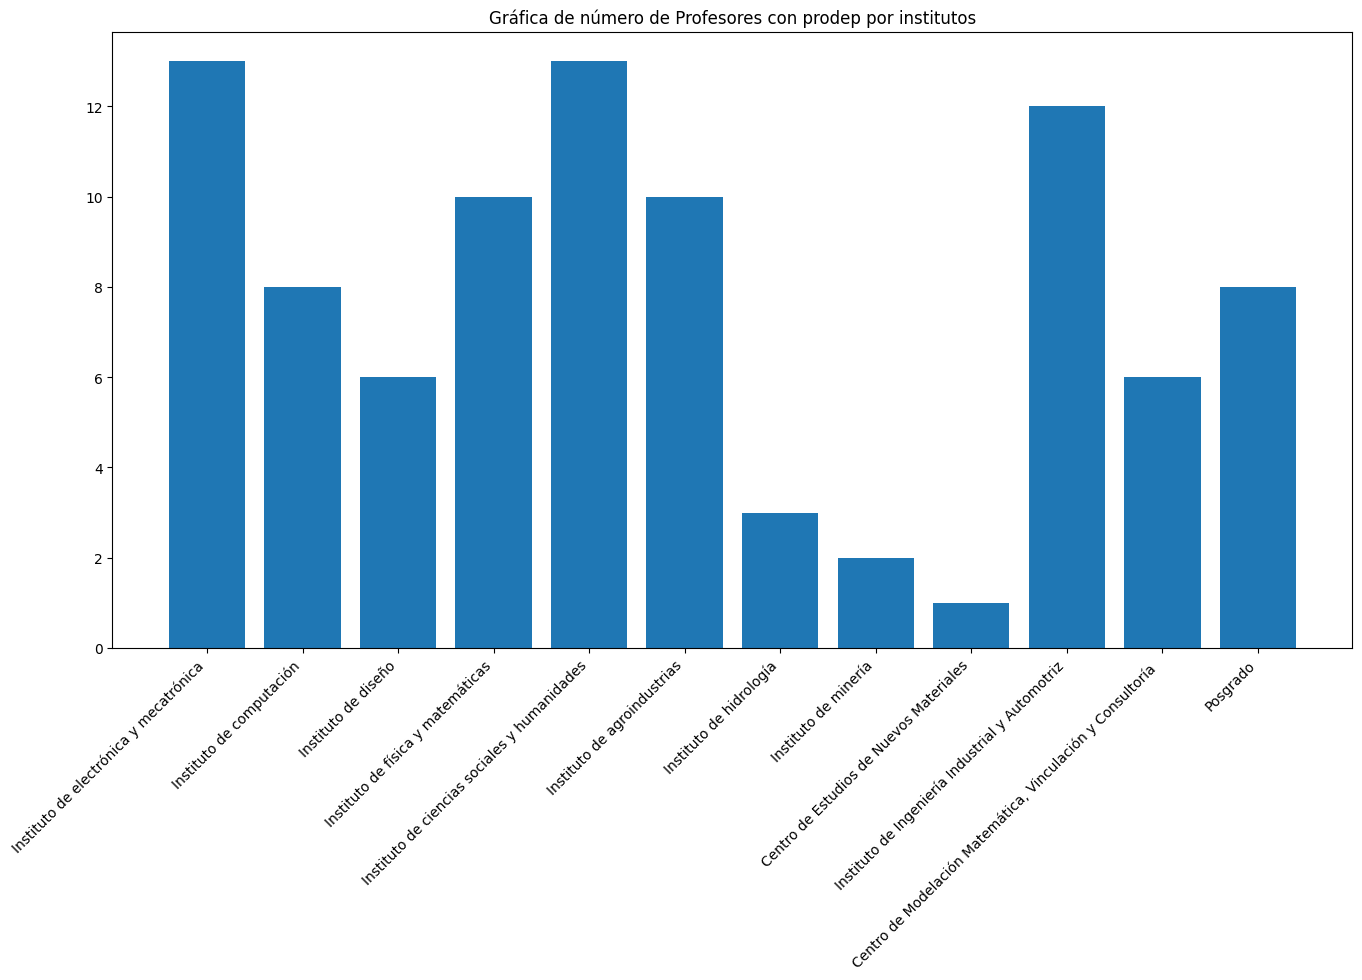

In [51]:
plt.figure(figsize=(16,8))
plt.bar(prodep_df['nombre'],prodep_df['cantidad'])
plt.title("UTM")
plt.title("Gráfica de número de Profesores con prodep por institutos")
plt.xticks(rotation=45, ha="right", fontsize=10)